# Task 1

## (A) Demonstrate that a neural network to maximize the log likelihood of label is one that has softmax output nodes and minimizes the criterion function of the negative log probability of training data set: 𝐽%(𝑤) = − log 𝑝({(𝑥!, 𝑡!): 𝑛 = 1,2, ... }; 𝑤) = −log∏!∏&'%,...,*𝑝(𝑡! =𝑚|𝑥!;𝑤)

## Negative Log-Likelihood (NLL)
Whenever we train a model, our aim is to optimize (minimize / maximize) a particular loss function. The Negative Log Likelihood (NLL) function works on the outputs as - 

$$ L(y) = - log(y) $$

We sum the above for all correct classes. 

Thus, in a Neural Network (NN), to find the minima of the loss function, we update the weights and biases using back-propagation. NLL behaves in the following manner - 

#### Gets really large at small values and really small at large values

Since in NLL, we are summing the loss function to all the correct classes, on every correct prediction, the loss is close to 0 and on every incorrect prediction, the loss grows larger.

## Softmax function:
The softmax function is a highly used function for classification when there are multiple possible classes, let's say $k$ classes. It's used mostly in conjunction with NLL for multi-class classification. 

As in the MNIST dataset, when there are 10 possible classes - 0 to 9, the softmax function should be used at the last layer of the Neural Network.

Let's understand why this is so. 

The softmax function is given by the following equation - 

$$ S(f_{y_{i}}) = \frac{e^{f_{y_{i}}}}{\sum_{j}e^{f_{N}}} $$

$$ where, y_{i} = targets$$<br>
$$ N = classes$$

The softmax function reduces a vector of size $k$ to one between 0 and 1. Also, as the above equation shows, the sum of the whole vector is equal to 1, as it is a normalization of the exponential. Essentially, softmax returns probabilities of a certain set of features belonging to a certain class. This increases the interpretability of the neural network for easier classification. 

Now, with the following derivation we can see how the log likelihood of a label is maximized by a neural network with softmax output nodes, and minimizes the criterion function of the NLL of training dataset.

## Derivation: 

Assume $f$ as a vector containing the class scores for a single example, i.e., the output of the network. Thus $f_{k}$ is an element for a certain class $k$ in all $N$ classes. 

Thus, the softmax output can be rewritten as - 

$$p_{k} = \frac{e^{f_{k}}}{\sum_{y}e^{f_{N}}} $$

and the NLL as 

$$L_{i} = -log(p_{y_{i}})$$

While performing backpropagation, the first thing to be done is to compute how the loss changes w.r.t the output of the network, which basically means $\frac{\partial L_{i}}{\partial f_{k}}$. 

Since $L$ is dependent on $p_{k}$, and $p$ is dependent on $f_{k}$, we can simply relate them via chain rule:

$$\frac{\partial L_{i}}{\partial f_{k}} = \frac{\partial L_{i}}{\partial p_{k}} \frac{\partial p_{k}}{\partial f_{k}}$$

Now, $$\frac{\partial L_{i}}{\partial p_{k}} = - \frac{1}{p_{k}} $$  

For $$\frac{\partial p_{k}}{\partial f_{k}},$$ we derive it by quotient rule as - 


$$\frac{f(x)}{g(x)} = \frac{g(x)Df(x) - f(x)Dg(x)}{g(x)^{2}}$$ and $D$ denotes the derivative. 

Let $$\sum_{N} e^{f_{N}} = \phi ,$$ so by substituting we obtain - 

$$ \frac{\partial p_{k}}{\partial f_{k}} = \frac{\partial }{\partial f_{k}} \left ( \frac{e^{f_{k}}}{\sum _{N}e^{f_{N}}} \right ) $$

$$ = \frac{\phi De^{f_{k}} - e^{f_{k}}D\phi }{\phi ^{2}}$$

$$ = \frac{e^{f_{k}} \left ( \phi  - e^{f_{k}}  \right )}{\phi ^{2}}$$

The reason behind $D\phi = e^{f_{k}}$ is because if we take the vector $f$ in the softmax function, we are always taking the derivative of the k-th element. Thus in this case, the derivate w.r.t the k-th element of all non-$k$ elements is always equal to 0, but $e^{f_{k}}$ at $k$.

Thus, $$\frac{\partial L_{i}}{\partial f_{k}} = \frac{e^{f_{k}}\left ( \phi - e^{f_{k}} \right )}{\phi ^{2}}$$
$$ = \frac{e^{f_{k}}}{\phi }\frac{\phi - e^{f_{k}}}{\phi }$$
$$ = p_{k} * (1 - p_{k})$$

Combining the previously calculated derivatives, we get - 
$$\frac{\partial L_{i}}{\partial f_{k}} = \frac{\partial L_{i}}{\partial p_{k}} \frac{\partial p_{k}}{\partial f_{k}}$$

$$ = - \frac{1}{p_{k}} \left ( p_{k} * \left ( 1 - p_{k} \right )\right )$$
$$ = \left ( p_{k}-1 \right )$$

Thus we can say that a neural network to maximize the log likelihood of label is one that has softmax output nodes and minimizes the criterion function of the negative log probability.

Reference: https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/

## (B) Demonstrate that a neural network to maximize the posterior probability of observing the training data given a Gaussian prior of the weight distribution 𝑝(𝑤; 𝛼) = 𝑁(0, 𝛼𝐼) is one that minimizes the criterion function with L2 regularization 𝐽(𝑤) = 𝐽%(𝑤) − log 𝑝(𝑤; 𝛼 − 1).

If we want to infer the parameter $\displaystyle \alpha $ from a set of input-output pairs $\displaystyle (x_1,y_1)\dots,(x_N,y_N) $ assuming that the outputs are linearly related to the inputs via $\displaystyle \alpha $ and corrupted by noise $\displaystyle \epsilon $, where $\displaystyle \epsilon $ is Gaussian noise with mean 0 and variance $\displaystyle \sigma^2 $. 
\begin{equation*}
y_n = \beta x_n + \epsilon
\end{equation*}
Gaussian likelihood of noise:
\begin{equation*}
\prod_{n=1}^N \mathcal{N}(y_n|\alpha x_n,\sigma^2)
\end{equation*}

Regularising the parameter $\displaystyle \alpha $ by imposing the Gaussian prior $\displaystyle \mathcal{N}(\beta|0,\lambda^{-1}), $ where $\displaystyle \lambda $ is a strictly positive scalar and combining the likelihood and the prior:
\begin{equation*}
\prod_{n=1}^N \mathcal{N}(y_n|\alpha x_n,\sigma^2) \mathcal{N}(\alpha|0,\lambda^{-1})
\end{equation*}

Taking the logarithm of this expression:
\begin{equation*}
\sum_{n=1}^N -\frac{1}{\sigma^2}(y_n-\alpha x_n)^2 - \lambda \alpha^2 + \mbox{const}
\end{equation*}
<br>
Maximizing this expression with respect to $\displaystyle \alpha $, gives maximum a-posteriori estimate for $\displaystyle \alpha $. Hence the Gaussian prior can be interpreted as a L2 regularization.

Reference: https://stats.stackexchange.com/questions/163388/why-is-the-l2-regularization-equivalent-to-gaussian-prior

# Task 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import defaultdict

In [2]:
train_data = np.loadtxt("Dataset/mnist_train.csv", delimiter=",")
test_data = np.loadtxt("Dataset/mnist_test.csv", delimiter=",")

In [3]:
# Train test split

x_train = []
y_train = []
x_test = []
y_test = []
for i in range(len(train_data)):
    x_train.append(train_data[i][1:])
    y_train.append(train_data[i][:1])
for i in range(len(test_data)):
    x_test.append(test_data[i][1:])
    y_test.append(test_data[i][:1])
    
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [5]:
# Implementing Standard Scaler

# Finding Mean
x_train_sum = 0
for i in x_train:
    x_train_sum += i
x_train_mean = x_train_sum/len(x_train)

# Finding Standard Deviation
x_train_sum = 0
for i in x_train:
    x_train_sum += np.power((i - x_train_mean),2)
x_train_std = np.sqrt(x_train_sum/len(x_train))

# Finding Z
for i in range(len(x_train)):
    x_train[i] = (x_train[i] - x_train_mean) / x_train_std
    x_train[i] = np.nan_to_num(x_train[i])

for i in range(len(x_test)):
    x_test[i] = (x_test[i] - x_train_mean) / x_train_std
    x_test[i] = np.nan_to_num(x_test[i])

C:\Users\mitde\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\Users\mitde\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
C:\Users\mitde\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


# (a) Build a neural network (without regularization) with 1 hidden layer of 30 sigmoid nodes, and an output layer of 10 softmax nodes. Train the neural network with 1000 training images (100 images per digit) for 30 complete epochs, using mini-batches of 10 training examples at a time and a learning rate of η = 0.1. Plot the training error, testing error, criterion function/loss on training data set, criterion function/loss on testing data set of a separate 1000 testing images (100 images per digit), and the learning speed of the hidden layer (the average absolute changes of weights divided by the values of the weights).

In [6]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LambdaCallback

In [7]:
train_dataset = defaultdict(list)
for i, j in zip(x_train, y_train):
    train_dataset[int(j)].append(i)
    
test_dataset = defaultdict(list)
for i, j in zip(x_test, y_test):
    test_dataset[int(j)].append(i)

In [8]:
train_x = []
train_y = []
for i in range(len(train_dataset)):
    for j in range(1000):
        train_x.append(train_dataset[i][j])
        train_y.append(i)
        
train_x = np.array(train_x)
train_y = np.array(train_y)

test_x = []
test_y = []
for i in range(len(test_dataset)):
    for j in range(100):
        test_x.append(test_dataset[i][j])
        test_y.append(i)
        
test_x = np.array(test_x)
test_y = np.array(test_y)

In [9]:
train_y = tensorflow.keras.utils.to_categorical(train_y, 10)
test_y = tensorflow.keras.utils.to_categorical(test_y, 10)

## A) Build a neural network (without regularization) with 1 hidden layer of 30 sigmoid nodes, and an output layer of 10 softmax nodes. Train the neural network with 1000 training images (100 images per digit) for 30 complete epochs, using mini-batches of 10 training examples at a time and a learning rate of η = 0.1. Plot the training error, testing error, criterion function/loss on training data set, criterion function/loss on testing data set of a separate 1000 testing images (100 images per digit), and the learning speed of the hidden layer (the average absolute changes of weights divided by the values of the weights).

In [10]:
accuracy_list = []
loss_list = []

### Model with 1 Layer without Regularizer:

In [11]:
model = Sequential()
model.add(Dense(30, activation = 'sigmoid', input_dim = 28 * 28))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = SGD(learning_rate = 0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
w = []
callback = LambdaCallback(on_epoch_end = lambda epoch, logs: w.append(model.layers[0].get_weights()))
history = model.fit(train_x, train_y, epochs = 30, batch_size = 10, verbose = 0, validation_split = 0, validation_data = (test_x, test_y), callbacks = [callback])
loss, accuracy = model.evaluate(test_x, test_y, batch_size = 10, verbose = False)
accuracy_list.append(accuracy)
loss_list.append(loss)

In [13]:
print("Accuracy without Regularizer: ",accuracy)

Accuracy without Regularizer:  0.9200000166893005


In [14]:
prev = 0
wt = np.array(w)
speed = []

for ind, item in enumerate(wt):
    wt[ind] = np.mean(np.mean(wt[ind]))

for w in wt:
    diff = w - prev
    speed.append(diff)
    prev = w

speed = np.array(speed)/np.sum(wt)

C:\Users\mitde\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


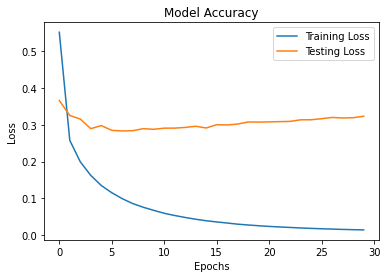

In [15]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Testing Loss'], loc = 'upper right')
plt.show()

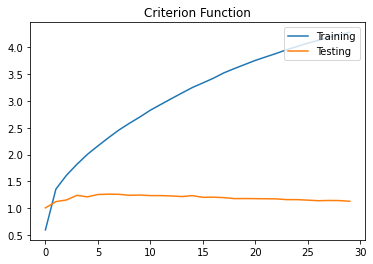

In [16]:
plt.figure()
plt.plot(-np.log(history.history['loss']) , label = 'Training')
plt.plot(-np.log(history.history['val_loss']), label = 'Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function")
plt.show()

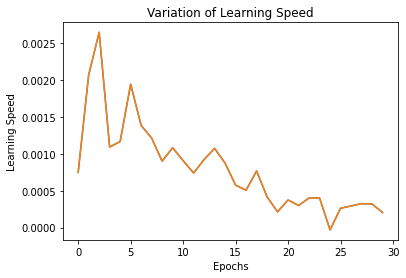

In [17]:
plt.figure()
plt.plot(speed)
plt.title("Variation of Learning Speed")
plt.ylabel('Learning Speed')
plt.xlabel('Epochs')
plt.show()

### Model with 1 Layer with Regularizer:

In [18]:
model2 = Sequential()
model2.add(Dense(30, activation = 'sigmoid', input_dim = 28 * 28, kernel_regularizer = regularizers.l2(5)))
model2.add(Dense(10, activation = 'softmax', kernel_regularizer = regularizers.l2(5)))
model2.compile(optimizer = SGD(learning_rate = 0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
w = []
callback = LambdaCallback(on_epoch_end = lambda epoch, logs: w.append(model2.layers[0].get_weights()))
history = model2.fit(train_x, train_y, epochs = 30, batch_size = 10, verbose = 0, validation_split = 0, validation_data = (test_x, test_y), callbacks = [callback])
loss, accuracy = model2.evaluate(test_x, test_y, batch_size = 10, verbose = False)
accuracy_list.append(accuracy)
loss_list.append(loss)

In [20]:
print("Accuracy with Regularizer: ",accuracy)

Accuracy with Regularizer:  0.10000000149011612


In [21]:
prev = 0
wt = np.array(w)
speed = []

for ind, item in enumerate(wt):
    wt[ind] = np.mean(np.mean(wt[ind]))

for w in wt:
    diff = w - prev
    speed.append(diff)
    prev = w

speed = np.array(speed)/np.sum(wt)

C:\Users\mitde\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


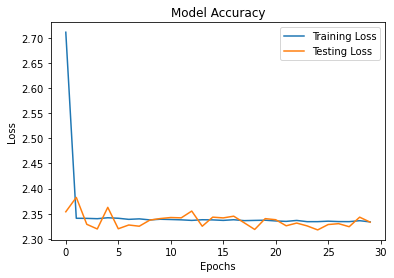

In [22]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Testing Loss'], loc = 'upper right')
plt.show()

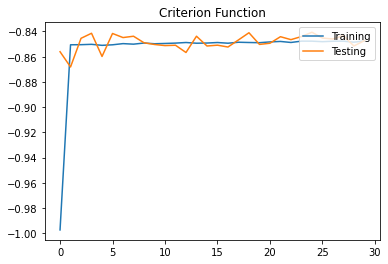

In [23]:
plt.figure()
plt.plot(-np.log(history.history['loss']) , label = 'Training')
plt.plot(-np.log(history.history['val_loss']), label = 'Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function")
plt.show()

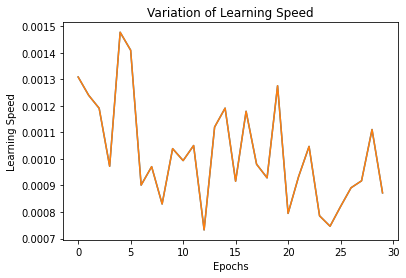

In [24]:
plt.figure()
plt.plot(speed)
plt.title("Variation of Learning Speed")
plt.ylabel('Learning Speed')
plt.xlabel('Epochs')
plt.show()

## B) Repeat Task-2(a) with 2 hidden layers of 30 sigmoid nodes each, 3 hidden layers of30 sigmoid nodes each, and with and without L2 regularization λ|w|2 and λ = 5. (i.e., you will repeat Task-2(a) for 5 times: one for 2 hidden layer network without regularization; one for 3 hidden layer network without regularization; and one times each for 1, 2, 3 hidden layers with regularization.) Note that it is okay to have low accuracies in this part. The purpose is to see how hyperparameter can affect the performance.

### Model with 2 Layers without Regularizer:

In [25]:
model3 = Sequential()
model3.add(Dense(30, activation = 'sigmoid', input_dim = 28 * 28))
model3.add(Dense(30, activation = 'sigmoid'))
model3.add(Dense(10, activation = 'softmax'))
model3.compile(optimizer = SGD(learning_rate = 0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
w = []
callback = LambdaCallback(on_epoch_end = lambda epoch, logs: w.append(model3.layers[0].get_weights()))
history = model3.fit(train_x, train_y, epochs = 30, batch_size = 10, verbose = 0, validation_split = 0, validation_data = (test_x, test_y), callbacks = [callback])
loss, accuracy = model3.evaluate(test_x, test_y, batch_size = 10, verbose = False)
accuracy_list.append(accuracy)
loss_list.append(loss)

In [27]:
print("Accuracy without Regularizer: ",accuracy)

Accuracy without Regularizer:  0.9070000052452087


In [28]:
prev = 0
wt = np.array(w)
speed = []

for ind, item in enumerate(wt):
    wt[ind] = np.mean(np.mean(wt[ind]))

for w in wt:
    diff = w - prev
    speed.append(diff)
    prev = w

speed = np.array(speed)/np.sum(wt)

C:\Users\mitde\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


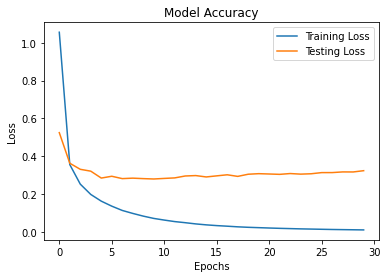

In [29]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Testing Loss'], loc = 'upper right')
plt.show()

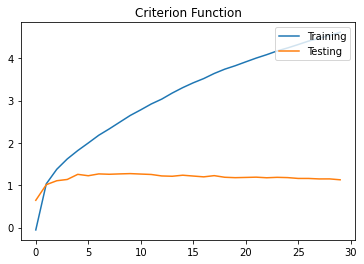

In [30]:
plt.figure()
plt.plot(-np.log(history.history['loss']) , label = 'Training')
plt.plot(-np.log(history.history['val_loss']), label = 'Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function")
plt.show()

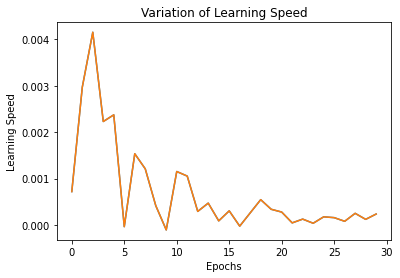

In [31]:
plt.figure()
plt.plot(speed)
plt.title("Variation of Learning Speed")
plt.ylabel('Learning Speed')
plt.xlabel('Epochs')
plt.show()

### Model with 2 Layers with Regularizer:

In [32]:
model4 = Sequential()
model4.add(Dense(30, activation = 'sigmoid', input_dim = 28 * 28, kernel_regularizer = regularizers.l2(5)))
model4.add(Dense(30, activation = 'sigmoid', kernel_regularizer = regularizers.l2(5)))
model4.add(Dense(10, activation = 'softmax', kernel_regularizer = regularizers.l2(5)))
model4.compile(optimizer = SGD(learning_rate = 0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [33]:
w = []
callback = LambdaCallback(on_epoch_end = lambda epoch, logs: w.append(model4.layers[0].get_weights()))
history = model4.fit(train_x, train_y, epochs = 30, batch_size = 10, verbose = 0, validation_split = 0, validation_data = (test_x, test_y), callbacks = [callback])
loss, accuracy = model4.evaluate(test_x, test_y, batch_size = 10, verbose = False)
accuracy_list.append(accuracy)
loss_list.append(loss)

In [34]:
print("Accuracy with Regularizer: ",accuracy)

Accuracy with Regularizer:  0.10000000149011612


In [35]:
prev = 0
wt = np.array(w)
speed = []

for ind, item in enumerate(wt):
    wt[ind] = np.mean(np.mean(wt[ind]))

for w in wt:
    diff = w - prev
    speed.append(diff)
    prev = w

speed = np.array(speed)/np.sum(wt)

C:\Users\mitde\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


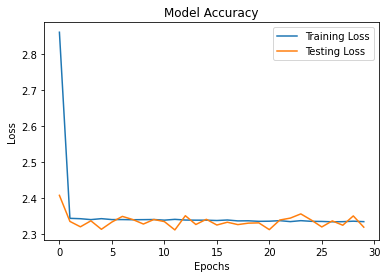

In [36]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Testing Loss'], loc = 'upper right')
plt.show()

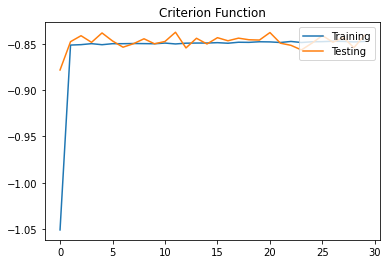

In [37]:
plt.figure()
plt.plot(-np.log(history.history['loss']) , label = 'Training')
plt.plot(-np.log(history.history['val_loss']), label = 'Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function")
plt.show()

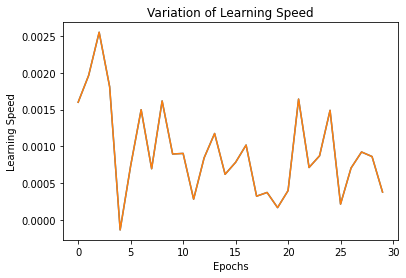

In [38]:
plt.figure()
plt.plot(speed)
plt.title("Variation of Learning Speed")
plt.ylabel('Learning Speed')
plt.xlabel('Epochs')
plt.show()

### Model with 3 Layers without Regularizer:

In [39]:
model5 = Sequential()
model5.add(Dense(30, activation = 'sigmoid', input_dim = 28 * 28))
model5.add(Dense(30, activation = 'sigmoid'))
model5.add(Dense(30, activation = 'sigmoid'))
model5.add(Dense(10, activation = 'softmax'))
model5.compile(optimizer = SGD(learning_rate = 0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [40]:
w = []
callback = LambdaCallback(on_epoch_end = lambda epoch, logs: w.append(model5.layers[0].get_weights()))
history = model5.fit(train_x, train_y, epochs = 30, batch_size = 10, verbose = 0, validation_split = 0, validation_data = (test_x, test_y), callbacks = [callback])
loss, accuracy = model5.evaluate(test_x, test_y, batch_size = 10, verbose = False)
accuracy_list.append(accuracy)
loss_list.append(loss)

In [41]:
print("Accuracy without Regularizer: ",accuracy)

Accuracy without Regularizer:  0.9010000228881836


In [42]:
prev = 0
wt = np.array(w)
speed = []

for ind, item in enumerate(wt):
    wt[ind] = np.mean(np.mean(wt[ind]))

for w in wt:
    diff = w - prev
    speed.append(diff)
    prev = w

speed = np.array(speed)/np.sum(wt)

C:\Users\mitde\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


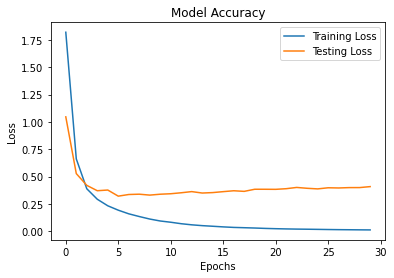

In [43]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Testing Loss'], loc = 'upper right')
plt.show()

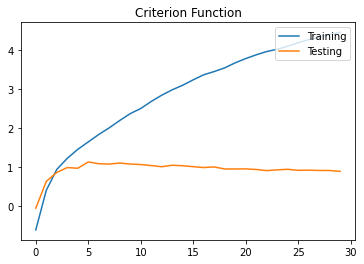

In [44]:
plt.figure()
plt.plot(-np.log(history.history['loss']) , label = 'Training')
plt.plot(-np.log(history.history['val_loss']), label = 'Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function")
plt.show()

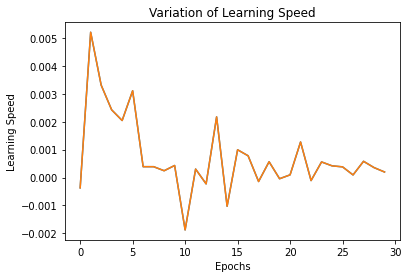

In [45]:
plt.figure()
plt.plot(speed)
plt.title("Variation of Learning Speed")
plt.ylabel('Learning Speed')
plt.xlabel('Epochs')
plt.show()

### Model with 3 Layers with Regularizer:

In [46]:
model6 = Sequential()
model6.add(Dense(30, activation = 'sigmoid', input_dim = 28 * 28, kernel_regularizer = regularizers.l2(5)))
model6.add(Dense(30, activation = 'sigmoid', kernel_regularizer = regularizers.l2(5)))
model6.add(Dense(30, activation = 'sigmoid', kernel_regularizer = regularizers.l2(5)))
model6.add(Dense(10, activation = 'softmax', kernel_regularizer = regularizers.l2(5)))
model6.compile(optimizer = SGD(learning_rate = 0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [47]:
w = []
callback = LambdaCallback(on_epoch_end = lambda epoch, logs: w.append(model6.layers[0].get_weights()))
history = model6.fit(train_x, train_y, epochs = 30, batch_size = 10, verbose = 0, validation_split = 0, validation_data = (test_x, test_y), callbacks = [callback])
loss, accuracy = model6.evaluate(test_x, test_y, batch_size = 10, verbose = False)
accuracy_list.append(accuracy)
loss_list.append(loss)

In [48]:
print("Accuracy with Regularizer: ",accuracy)

Accuracy with Regularizer:  0.10000000149011612


In [49]:
prev = 0
wt = np.array(w)
speed = []

for ind, item in enumerate(wt):
    wt[ind] = np.mean(np.mean(wt[ind]))

for w in wt:
    diff = w - prev
    speed.append(diff)
    prev = w

speed = np.array(speed)/np.sum(wt)

C:\Users\mitde\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


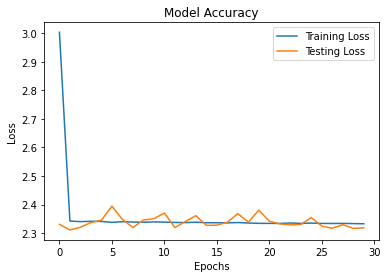

In [50]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Testing Loss'], loc = 'upper right')
plt.show()

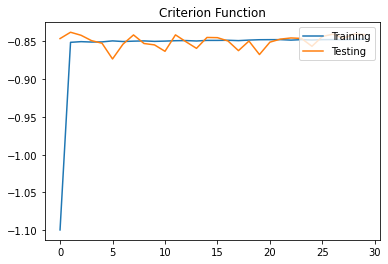

In [51]:
plt.figure()
plt.plot(-np.log(history.history['loss']) , label = 'Training')
plt.plot(-np.log(history.history['val_loss']), label = 'Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function")
plt.show()

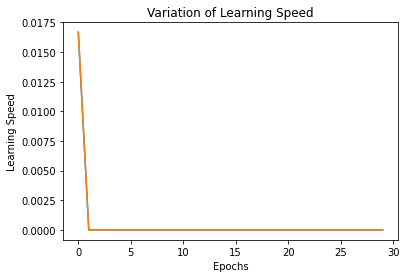

In [52]:
plt.figure()
plt.plot(speed)
plt.title("Variation of Learning Speed")
plt.ylabel('Learning Speed')
plt.xlabel('Epochs')
plt.show()

In [53]:
print("Model: 1 Layer without Regularizer, Accuracy:  ", accuracy_list[0]," Loss: ", loss_list[0])
print("Model: 1 Layer with Regularizer, Accuracy:     ", accuracy_list[1],"   Loss: ", loss_list[1])
print("Model: 2 Layers without Regularizer, Accuracy: ", accuracy_list[2]," Loss: ", loss_list[2])
print("Model: 2 Layers with Regularizer, Accuracy:    ", accuracy_list[3],"   Loss: ", loss_list[3])
print("Model: 3 Layers without Regularizer, Accuracy: ", accuracy_list[4]," Loss: ", loss_list[4])
print("Model: 3 Layers with Regularizer, Accuracy:    ", accuracy_list[5],"   Loss: ", loss_list[5])

Model: 1 Layer without Regularizer, Accuracy:   0.9200000166893005  Loss:  0.3232465088367462
Model: 1 Layer with Regularizer, Accuracy:      0.10000000149011612    Loss:  2.333195686340332
Model: 2 Layers without Regularizer, Accuracy:  0.9070000052452087  Loss:  0.32333919405937195
Model: 2 Layers with Regularizer, Accuracy:     0.10000000149011612    Loss:  2.3182883262634277
Model: 3 Layers without Regularizer, Accuracy:  0.9010000228881836  Loss:  0.40778589248657227
Model: 3 Layers with Regularizer, Accuracy:     0.10000000149011612    Loss:  2.3187739849090576


## (C) First, construct and train convolutional neural network without regularization for MNIST classification. Then, regularize the training of the neural network through dropout (randomly sets elements to zero to prevent overfitting). Finally, regularize the training of neural network through augmenting your selection of 1000 images by rotating them for 1-3 degrees clockwise and counter clockwise, and shifting them for 3 pixels in 8 different.

In [54]:
from tensorflow.keras.layers import Conv2D, Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [66]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation = 'relu')) 
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(10, activation = 'softmax'))
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.1), metrics=['accuracy'])

In [67]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

In [68]:
history_cnn = cnn_model.fit(train_x, train_y, batch_size = 10, epochs = 30, verbose = False, validation_data = (test_x, test_y))

In [69]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_x, test_y, verbose = 0)

In [70]:
from scipy.ndimage import rotate, shift
import random

In [71]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation = 'relu')) 
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(10, activation = 'softmax'))
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.1), metrics=['accuracy'])

In [72]:
train_x_aug = []
for x in train_x:
    train_x_aug.append(rotate(shift(x, 3.0).reshape((28, 28, 1)), random.randrange(-3, 3) ,(1,0), reshape=False))
    
test_x_aug = []
for x in test_x:
    test_x_aug.append(rotate(shift(x, 3.0).reshape((28, 28, 1)), random.randrange(-3, 3) ,(1,0), reshape=False))

train_x_aug = np.array(train_x_aug)
test_x_aug = np.array(test_x_aug)

In [73]:
history_cnn_aug = cnn_model.fit(train_x_aug, train_y, batch_size = 10, epochs = 30, verbose = False, validation_data = (test_x_aug, test_y))

In [74]:
cnn_loss_aug, cnn_accuracy_aug = cnn_model.evaluate(test_x_aug, test_y, verbose =0 )

In [75]:
print("Accuracy before augmentation:", cnn_accuracy)
print("Accuracy after augmentation:", cnn_accuracy_aug)

Accuracy before augmentation: 0.10000000149011612
Accuracy after augmentation: 0.10000000149011612


Text(0.5, 1.0, 'Accuracy Curves before Augmentation')

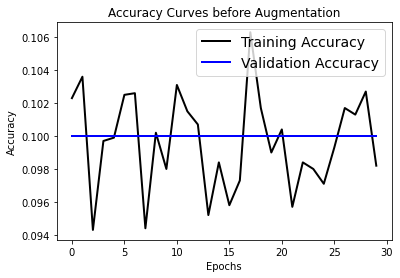

In [77]:
plt.figure(figsize=[6,4])
plt.plot(history_cnn.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_cnn.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves before Augmentation', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves before Augmentation')

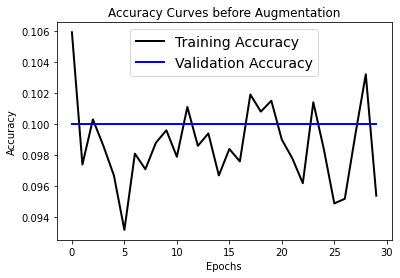

In [78]:
plt.figure(figsize=[6,4])
plt.plot(history_cnn_aug.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_cnn_aug.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves before Augmentation', fontsize=12)

## References:
1) https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
2) https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
3) https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65
4) https://towardsdatascience.com/regularization-machine-learning-891e9a62c58d